In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import yfinance as yf
import requests
from bs4 import BeautifulSoup

from arch import arch_model

import statistics as stat
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pmdarima import auto_arima


### Gold ETF: SPDR Gold Trust (GLD)

**Importing the gold ETF prices for the months of October 2019 and November 2019:**

In [2]:
#Gold ETF: GLD
GLD = yf.Ticker('GLD')
dfGLD = GLD.history(start='2019-10-01', end='2019-11-30')
dfGLD = dfGLD[['Open', 'High', 'Low', 'Close']]
dfGLD.reset_index(inplace=True)
print(dfGLD.head())

        Date        Open        High         Low       Close
0 2019-09-30  139.770004  140.210007  138.029999  138.869995
1 2019-10-01  138.070007  140.190002  137.800003  139.630005
2 2019-10-02  140.789993  141.880005  140.460007  141.259995
3 2019-10-03  141.360001  143.250000  141.289993  141.899994
4 2019-10-04  141.479996  142.309998  141.139999  141.899994


### Equity ETF: Vanguard FTSE All World ex US ETF (VEU) 

**Importing the equity ETF price for the months of October 2019 and November 2019:**

In [3]:
#Equity ETF: VEU
VEU = yf.Ticker('VEU')
dfVEU = VEU.history(start='2019-10-01', end='2019-11-30')
dfVEU = dfVEU[['Open', 'High', 'Low', 'Close']]
dfVEU.reset_index(inplace=True)
print(dfVEU.head())

        Date       Open       High        Low      Close
0 2019-09-30  47.384885  47.546542  47.356355  47.451450
1 2019-10-01  47.356357  47.403903  46.975987  47.052059
2 2019-10-02  46.557576  46.557576  46.120149  46.243771
3 2019-10-03  46.281799  46.624135  46.110635  46.595608
4 2019-10-04  46.624144  46.985498  46.595617  46.947460


**Computing the daily returns of the Gold ETF and Equity ETF**

In [4]:
#Add GLD daily returns to table
dfGLD['Daily Return'] = dfGLD['Close'] / dfGLD['Close'].shift(1) - 1
print(dfGLD.head())

        Date        Open        High         Low       Close  Daily Return
0 2019-09-30  139.770004  140.210007  138.029999  138.869995           NaN
1 2019-10-01  138.070007  140.190002  137.800003  139.630005      0.005473
2 2019-10-02  140.789993  141.880005  140.460007  141.259995      0.011674
3 2019-10-03  141.360001  143.250000  141.289993  141.899994      0.004531
4 2019-10-04  141.479996  142.309998  141.139999  141.899994      0.000000


In [5]:
#Add VEU daily returns to table
dfVEU['Daily Return'] = dfVEU['Close'] / dfVEU['Close'].shift(1) - 1
print(dfVEU.head())

        Date       Open       High        Low      Close  Daily Return
0 2019-09-30  47.384885  47.546542  47.356355  47.451450           NaN
1 2019-10-01  47.356357  47.403903  46.975987  47.052059     -0.008417
2 2019-10-02  46.557576  46.557576  46.120149  46.243771     -0.017179
3 2019-10-03  46.281799  46.624135  46.110635  46.595608      0.007608
4 2019-10-04  46.624144  46.985498  46.595617  46.947460      0.007551


## Descriptive statistics

**Average prices**

In [7]:
month = 'October'

gld_oct_avg = stat.mean(dfGLD.loc[pd.to_datetime(dfGLD['Date']).dt.month == 10, 'Close'])
print ("Average closing price of GLD in October = ".format(month) + "{0:0.3f}".format(gld_oct_avg))
gld_nov_avg = stat.mean(dfGLD.loc[pd.to_datetime(dfGLD['Date']).dt.month == 11, 'Close'])
print ("Average closing price of GLD in November = ".format(month) + "{0:0.3f}".format(gld_nov_avg))

Average closing price of GLD in October = 140.875
Average closing price of GLD in November = 138.570


In [8]:
month = 'November'

veu_oct_avg = stat.mean(dfVEU.loc[pd.to_datetime(dfVEU['Date']).dt.month == 10, 'Close'])
print ("Average closing price of VEU in October = ".format(month) + "{0:0.3f}".format(veu_oct_avg))
veu_nov_avg = stat.mean(dfVEU.loc[pd.to_datetime(dfVEU['Date']).dt.month == 11, 'Close'])
print ("Average closing price of VEU in November = ".format(month) + "{0:0.3f}".format(veu_nov_avg))

Average closing price of VEU in October = 47.936
Average closing price of VEU in November = 49.779


**Standard deviations**

In [10]:
gld_oct_stdev = stat.stdev(dfGLD.loc[pd.to_datetime(dfGLD['Date']).dt.month == 10, 'Close'])
print ("Standard deviation of closing price of GLD in October = ".format(month) + "{0:0.3f}".format(gld_oct_stdev))
gld_nov_stdev = stat.stdev(dfGLD.loc[pd.to_datetime(dfGLD['Date']).dt.month == 11, 'Close'])
print ("Standard deviation of closing price of GLD in November = ".format(month) + "{0:0.3f}".format(gld_nov_stdev))

Standard deviation of closing price of GLD in October = 0.831
Standard deviation of closing price of GLD in November = 1.562


In [11]:
veu_oct_stdev = stat.stdev(dfVEU.loc[pd.to_datetime(dfVEU['Date']).dt.month == 10, 'Close'])
print ("Standard deviation of closing price of VEU in October = ".format(month) + "{0:0.3f}".format(veu_oct_stdev))
veu_nov_stdev = stat.stdev(dfVEU.loc[pd.to_datetime(dfVEU['Date']).dt.month == 11, 'Close'])
print ("Standard deviation of closing price of VEU in November = ".format(month) + "{0:0.3f}".format(veu_nov_stdev))

Standard deviation of closing price of VEU in October = 0.997
Standard deviation of closing price of VEU in November = 0.202


**Plotting the prices**

In [12]:
#combine closing prices from both ETFs into one table
dfPrices = dfGLD[['Date', 'Close']].copy()
dfPrices = dfPrices.merge(dfVEU[['Date', 'Close']], how='left', on='Date')
dfPrices.rename(columns={'Close_x': 'GLD_Close', 'Close_y': 'VEU_Close'}, inplace=True)
print(dfPrices.head())

        Date   GLD_Close  VEU_Close
0 2019-09-30  138.869995  47.451450
1 2019-10-01  139.630005  47.052059
2 2019-10-02  141.259995  46.243771
3 2019-10-03  141.899994  46.595608
4 2019-10-04  141.899994  46.947460


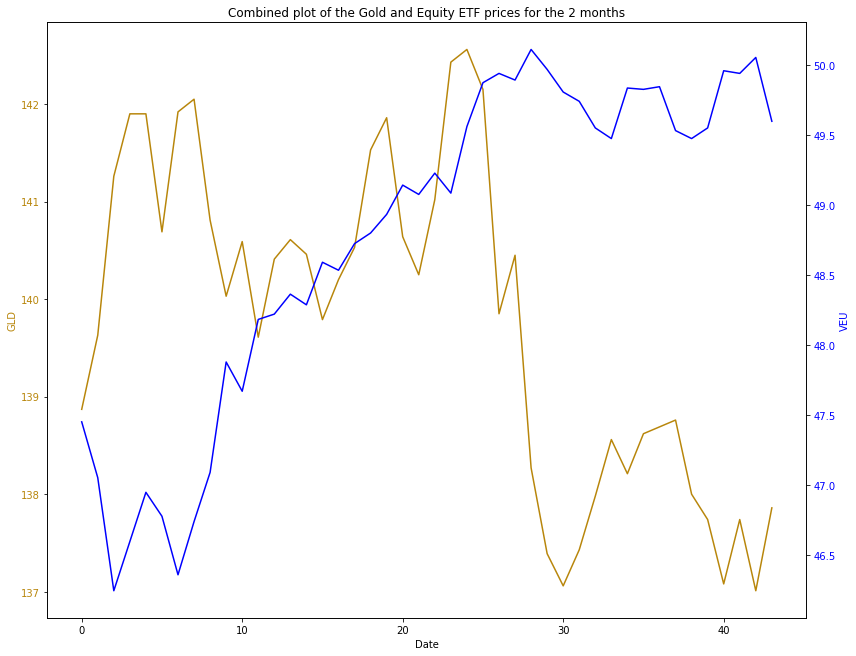

In [13]:
fig, ax1 = plt.subplots(figsize=(12,9))
gld_color = 'darkgoldenrod'
ax1.set_xlabel('Date')
ax1.set_ylabel('GLD', color=gld_color)
ax1.plot(dfPrices['GLD_Close'], color=gld_color)
ax1.tick_params(axis='y', labelcolor=gld_color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
veu_color = 'blue'
ax2.set_ylabel('VEU', color=veu_color)  # we already handled the x-label with ax1
ax2.plot(dfPrices['VEU_Close'], color=veu_color)
ax2.tick_params(axis='y', labelcolor=veu_color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Combined plot of the Gold and Equity ETF prices for the 2 months')
plt.show()

## Modeling Prices

In [14]:
dfPrices1 = dfPrices
dfPrices1['Date'] = pd.to_datetime(dfPrices['Date'])
dfPrices1.set_index('Date', inplace=True)
dfPrices1.head()

,GLD_Close,VEU_Close
Date,,
2019-09-30,138.869995,47.451450
2019-10-01,139.630005,47.052059
2019-10-02,141.259995,46.243771
2019-10-03,141.899994,46.595608
2019-10-04,141.899994,46.947460


In [15]:
#Transformation: First Differencing
dfgo = dfPrices1['GLD_Close']['10/1/2019':'10/31/2019'].diff()   # First differencing Oct prices Gold
dfgn = dfPrices1['GLD_Close']['11/1/2019':'11/29/2019'].diff()   # First differencing Nov prices Gold
dfeo = dfPrices1['VEU_Close']['10/1/2019':'10/31/2019'].diff()   # First differencing Oct prices Equity
dfen = dfPrices1['VEU_Close']['11/1/2019':'11/29/2019'].diff()   # First differencing Nov prices Equity

**ARMA (2,2) model for Oct gold ETF 1st diff prices.**

Levels are non stationary (ADF p-val:0.289035968), so we choose 1st differences (ADF p-val:0.08). Although, the first differences are also not stationary (strictly speaking), since the data set is so small, we decided to use it anyways since it is close enough.

Although PACF and ACF suggest that none of the coeffiecients cross the threshold, AR(2) and MA(2) are the closest we get. So we have decided to use that

ADF Statistic: -1.994
p-value: 0.289035968
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682


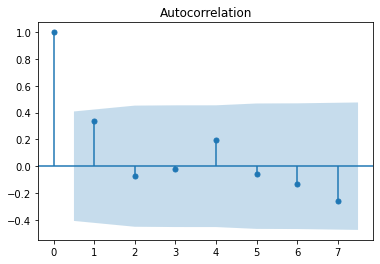

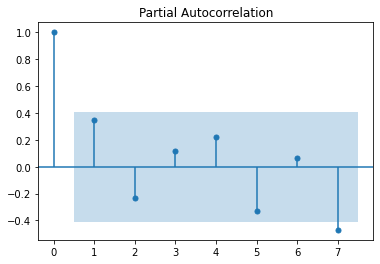

In [16]:
#Checking stationarity of Levels
xtest = dfPrices1['GLD_Close']['10/1/2019':'10/31/2019'] 
xtest = xtest.dropna()     

result = adfuller(xtest)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest, lags=7)
plt.show()
plot_pacf(xtest, lags=7)
plt.show()

ADF Statistic: -2.623
p-value: 0.088325867
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


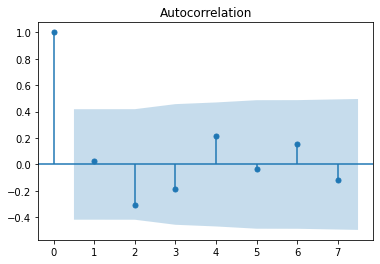

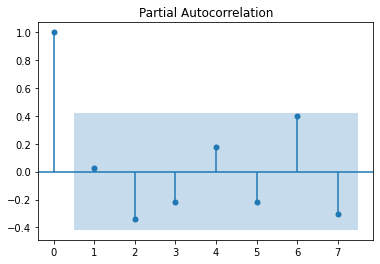

In [17]:
# for first difference:
xtest = dfgo.dropna()     

result = adfuller(xtest)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest, lags=7)
plt.show()
plot_pacf(xtest, lags=7)
plt.show()

In [18]:
xtest=dfgo.dropna()
mod = ARIMA(xtest, exog=None, order=(2, 0, 2))
res = mod.fit()
print(res.summary())
print()

C:\Users\ragha\anaconda3\envs\WQU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\ragha\anaconda3\envs\WQU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\ragha\anaconda3\envs\WQU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              GLD_Close   No. Observations:                   22
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -24.881
Date:                Tue, 21 Dec 2021   AIC                             61.763
Time:                        09:45:23   BIC                             68.309
Sample:                    10-02-2019   HQIC                            63.305
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0879      0.144      0.610      0.542      -0.194       0.370
ar.L1          0.7063      0.183      3.866      0.000       0.348       1.064
ar.L2         -0.9830      0.151     -6.505      0.0

C:\Users\ragha\anaconda3\envs\WQU\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
#trying auto arima
stepwise_fit = auto_arima(xtest, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=61.766, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=59.266, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=61.250, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=61.210, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57.754, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.556 seconds


#### Reversing the transformations to plot the ARIMA estimates - October Gold

In [20]:
ARIMA_diff_predictions = pd.Series(res.fittedvalues, copy=True)
print(ARIMA_diff_predictions.tail())

Date
2019-10-25   -0.190489
2019-10-28   -0.398904
2019-10-29    0.058109
2019-10-30    0.649021
2019-10-31    0.530791
dtype: float64


In [21]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.tail())

Date
2019-10-25    1.517178
2019-10-28    1.118274
2019-10-29    1.176383
2019-10-30    1.825405
2019-10-31    2.356196
dtype: float64


In [22]:
go = dfPrices1['GLD_Close']['2019-10-01':'2019-10-31']
predictions_ARIMA = pd.Series(go, index=go.index)
predictions_ARIMA = predictions_ARIMA.add(ARIMA_diff_predictions_cumsum,fill_value=0)
predictions_ARIMA.tail()

Date
2019-10-25    143.377179
2019-10-28    141.758274
2019-10-29    141.426383
2019-10-30    142.845409
2019-10-31    144.786189
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.0568')

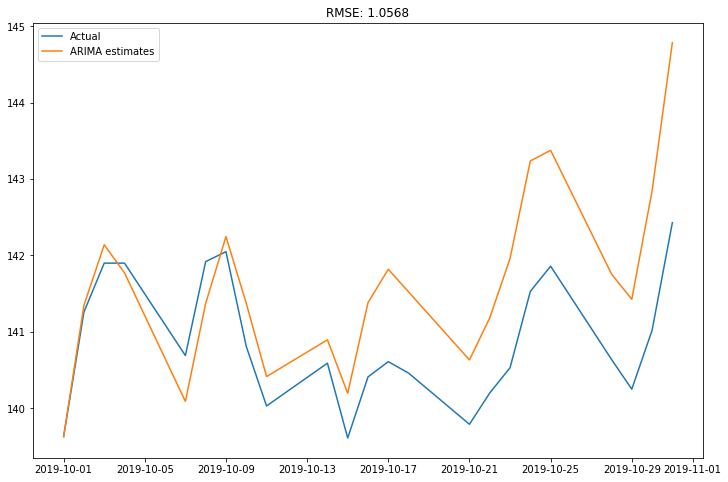

In [23]:
plt.figure(figsize=(12,8))
plt.plot(go, label="Actual")
plt.plot(predictions_ARIMA, label="ARIMA estimates")
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-go)**2)/len(go)))

**ARMA (2,2) model for Nov gold ETF - first diff prices.**

The ADF test says that the levels are stationary. However, when we plot the prices we can see on visual inspection that the mean is not stationary. Therefore, we have decided to transform using first differencing.

ADF Statistic: -2.950
p-value: 0.039816860
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


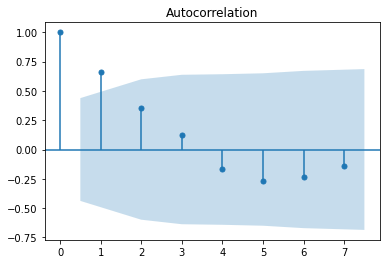

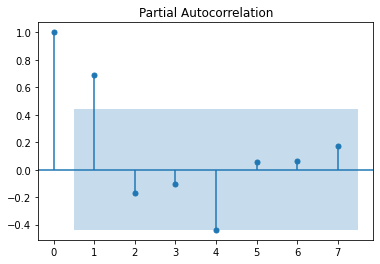

In [24]:
#Checking stationarity of Levels 
xtest2 = dfPrices1['GLD_Close']['11/1/2019':'11/29/2019'] 
xtest2 = xtest2.dropna()     

result = adfuller(xtest2)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest2, lags=7)
plt.show()
plot_pacf(xtest2, lags=7)
plt.show()

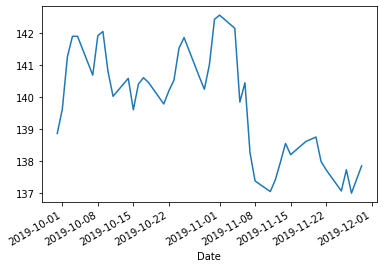

In [25]:
#Plotting the Prices
dfPrices1['GLD_Close'].plot()
plt.show()

First differencing of the data gives an ADF p value: 0.000. ACF and PACF suggest a AR(2) and MA(2) model even though the threshold hasn't been strictly breached.

ADF Statistic: -7.145
p-value: 0.000000000
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


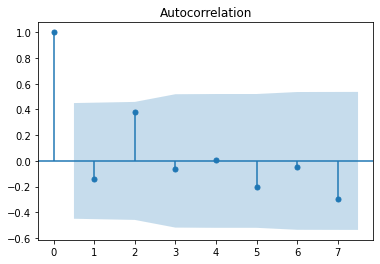

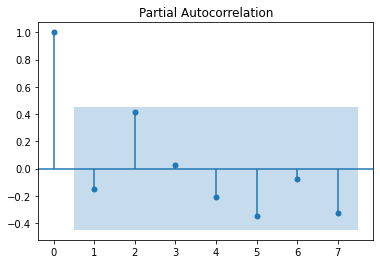

In [26]:
# for first difference:
xtest2 = dfgn.dropna()     

result = adfuller(xtest2)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest2, lags=7)
plt.show()
plot_pacf(xtest2, lags=7)
plt.show()

In [28]:
import warnings
warnings.filterwarnings('ignore')

xtest2 = dfgn.dropna()
mod2 = ARIMA(xtest2, exog=None, order=(2, 0, 2))
res2 = mod2.fit()
arima_residuals2 = res2.resid
print(res2.summary())
print()

                               SARIMAX Results                                
Dep. Variable:              GLD_Close   No. Observations:                   19
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -23.885
Date:                Tue, 21 Dec 2021   AIC                             59.769
Time:                        09:47:27   BIC                             65.436
Sample:                             0   HQIC                            60.728
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2309      0.292     -0.790      0.429      -0.804       0.342
ar.L1         -0.1274   8478.002   -1.5e-05      1.000   -1.66e+04    1.66e+04
ar.L2          0.8726   7398.045      0.000      1.0

In [29]:
#trying auto arima
stepwise_fit = auto_arima(xtest2, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55.596, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=52.305, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=53.904, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=54.079, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51.807, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.411 seconds


#### Reversing the transformations to plot the ARIMA estimates - November Gold

In [30]:
ARIMA_diff_predictions2 = pd.Series(res2.fittedvalues, copy=True)
print(ARIMA_diff_predictions2.tail())

Date
2019-11-22   -0.236175
2019-11-25   -0.233252
2019-11-26   -0.192502
2019-11-27   -0.279106
2019-11-29   -0.229329
dtype: float64


In [31]:
ARIMA_diff_predictions2_cumsum = ARIMA_diff_predictions2.cumsum()
print(ARIMA_diff_predictions2_cumsum.tail())

Date
2019-11-22   -2.151431
2019-11-25   -2.384683
2019-11-26   -2.577184
2019-11-27   -2.856291
2019-11-29   -3.085619
dtype: float64


In [32]:
gn = dfPrices1['GLD_Close']['2019-11-01':'2019-11-29']
predictions2_ARIMA = pd.Series(gn, index=gn.index)
predictions2_ARIMA = predictions2_ARIMA.add(ARIMA_diff_predictions2_cumsum,fill_value=0)
predictions2_ARIMA.tail()

Date
2019-11-22    135.588574
2019-11-25    134.695319
2019-11-26    135.162821
2019-11-27    134.153704
2019-11-29    134.774381
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.5553')

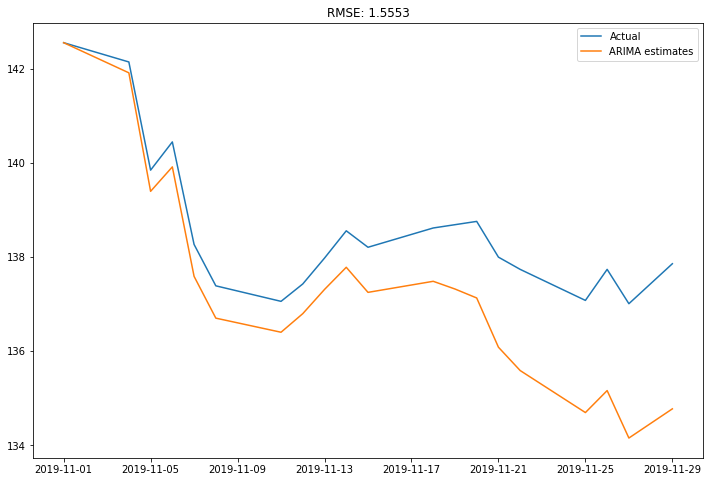

In [33]:
plt.figure(figsize=(12,8))
plt.plot(gn, label="Actual")
plt.plot(predictions2_ARIMA, label="ARIMA estimates")
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions2_ARIMA-gn)**2)/len(gn)))

**ARMA (2,2) model for Oct equity ETF 1st diff prices.**

Levels are non stationary (ADF p-val:0.702227296), so we choose 1st differences (ADF p-val:0.003) that are stationary.

ADF Statistic: -1.132
p-value: 0.702233003
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


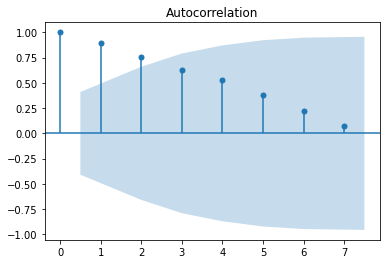

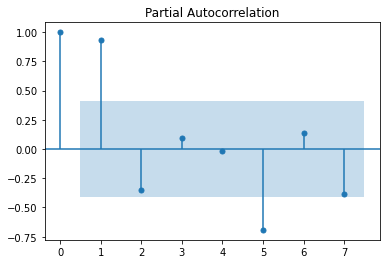

In [34]:
#Checking stationarity of Levels 
xtest3 = dfPrices1['VEU_Close']['10/1/2019':'10/31/2019'] 
xtest3 = xtest3.dropna()     

result = adfuller(xtest3)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest3, lags=7)
plt.show()
plot_pacf(xtest3, lags=7)
plt.show()

ADF Statistic: -6.735
p-value: 0.000000003
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


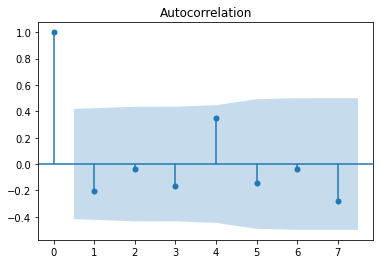

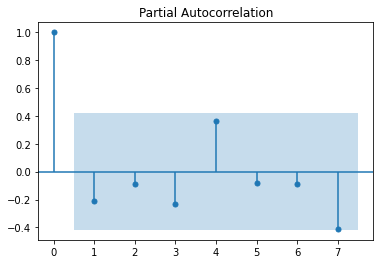

In [35]:
# for first difference:
xtest3 = dfeo.dropna()     

result = adfuller(xtest3)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest3, lags=7)
plt.show()
plot_pacf(xtest3, lags=7)
plt.show()

In [36]:
xtest3 = dfeo.dropna()
mod3 = ARIMA(xtest3, exog=None, order=(2, 0, 2))
res3 = mod3.fit()
print(res3.summary())
print()

                               SARIMAX Results                                
Dep. Variable:              VEU_Close   No. Observations:                   22
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.909
Date:                Tue, 21 Dec 2021   AIC                             23.817
Time:                        09:48:18   BIC                             30.363
Sample:                    10-02-2019   HQIC                            25.359
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.091      0.901      0.368      -0.096       0.260
ar.L1         -0.5857      0.479     -1.222      0.222      -1.525       0.354
ar.L2         -0.6392      0.556     -1.149      0.2

In [37]:
#trying auto arima
stepwise_fit = auto_arima(xtest3, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17.606, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18.185, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17.782, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17.273, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.513 seconds


#### Reversing the transformations for 6.3 to plot the ARIMA estimates - October Equity

In [38]:
ARIMA_diff_predictions3 = pd.Series(res3.fittedvalues, copy=True)
print(ARIMA_diff_predictions3.tail())

Date
2019-10-25    0.135355
2019-10-28    0.089547
2019-10-29    0.065862
2019-10-30    0.094204
2019-10-31    0.057508
dtype: float64


In [39]:
ARIMA_diff_predictions3_cumsum = ARIMA_diff_predictions3.cumsum()
print(ARIMA_diff_predictions3_cumsum.tail())

Date
2019-10-25    1.569325
2019-10-28    1.658872
2019-10-29    1.724734
2019-10-30    1.818938
2019-10-31    1.876445
dtype: float64


In [40]:
eo = dfPrices1['VEU_Close']['2019-10-01':'2019-10-31']
predictions3_ARIMA = pd.Series(eo, index=eo.index)
predictions3_ARIMA = predictions3_ARIMA.add(ARIMA_diff_predictions3_cumsum,fill_value=0)
predictions3_ARIMA.tail()

Date
2019-10-25    50.504231
2019-10-28    50.802976
2019-10-29    50.802275
2019-10-30    51.048636
2019-10-31    50.963497
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.0996')

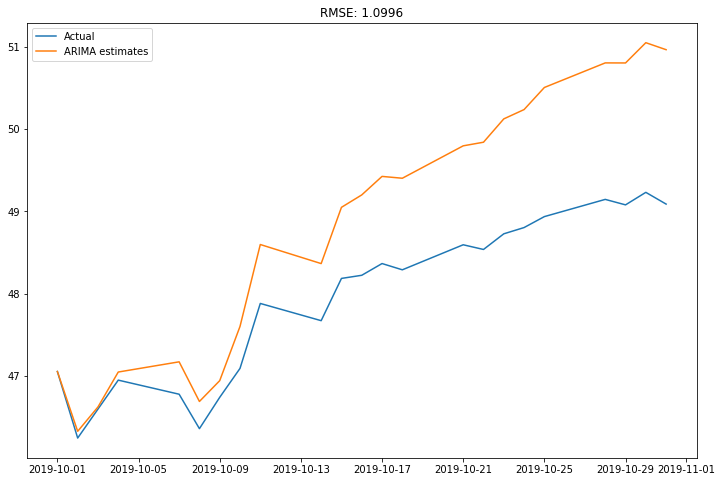

In [41]:
plt.figure(figsize=(12,8))
plt.plot(eo, label="Actual")
plt.plot(predictions3_ARIMA, label="ARIMA estimates")
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions3_ARIMA-eo)**2)/len(eo)))

**ARMA (1,0) model for second differenced Nov equity ETF prices.**

Levels are stationary (ADF p-val:0.514195088) and even first differencing is not stationary (ADF p-val: 0.700252703). So we have decided to do a second differencing (ADF p-val: 0.000000000)

ADF Statistic: -1.539
p-value: 0.514063221
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


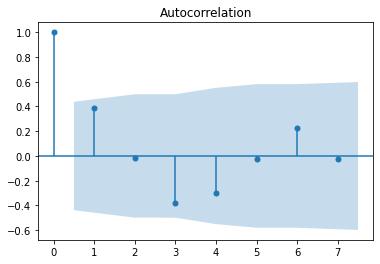

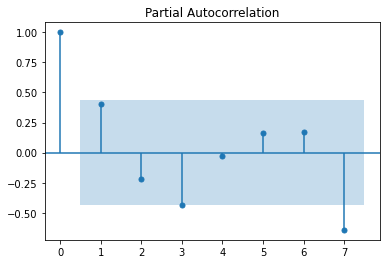

In [42]:
#Checking stationarity of Levels 
xtest4 = dfPrices1['VEU_Close']['11/1/2019':'11/29/2019'] 
xtest4 = xtest4.dropna()     

result = adfuller(xtest4)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest4, lags=7)
plt.show()
plot_pacf(xtest4, lags=7)
plt.show()

ADF Statistic: -1.137
p-value: 0.700236292
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


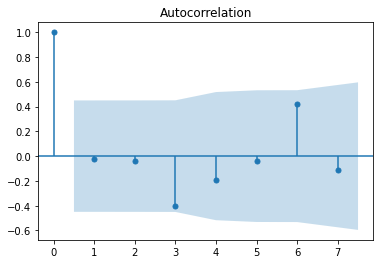

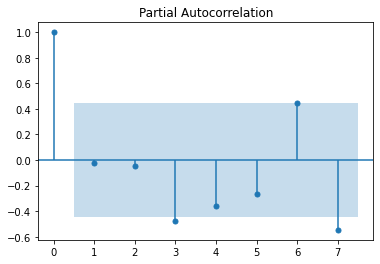

In [43]:
# for first difference:
xtest4 = dfen.dropna()     

result = adfuller(xtest4)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest4, lags=7)
plt.show()
plot_pacf(xtest4, lags=7)
plt.show()

ADF p-value on first differencing is 0.700252703. So, we have decided to conduct second differencing in order to make the data stationary

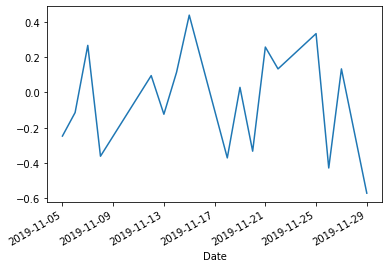

In [44]:
#second differencing - since first differencing was also not stationary
dfen2 = dfen.diff()
dfen2 = dfen2.dropna()
dfen2.plot()
plt.show()

ADF Statistic: -7.528
p-value: 0.000000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


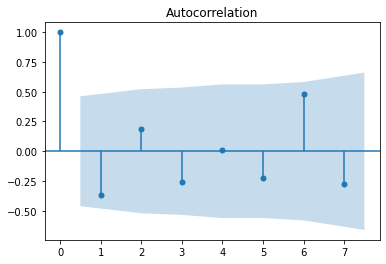

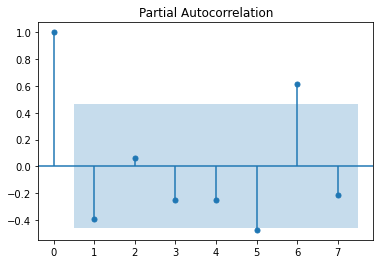

In [45]:
# for second difference:
xtest4 = dfen2.dropna()     

result = adfuller(xtest4)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(xtest4, lags=7)
plt.show()
plot_pacf(xtest4, lags=7)
plt.show()

In [46]:
xtest4 = dfen2
mod4 = ARIMA(xtest4, exog=None, order=(1, 0, 1))
res4 = mod4.fit()
arima_residuals4 = res4.resid
print(res4.summary())
print()

                               SARIMAX Results                                
Dep. Variable:              VEU_Close   No. Observations:                   18
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  -0.567
Date:                Tue, 21 Dec 2021   AIC                              9.133
Time:                        09:49:16   BIC                             12.695
Sample:                             0   HQIC                             9.624
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0385      0.079     -0.487      0.626      -0.193       0.116
ar.L1         -0.9693      0.330     -2.937      0.003      -1.616      -0.322
ma.L1          0.8140      0.791      1.030      0.3

In [47]:
#trying auto arima
stepwise_fit = auto_arima(xtest4, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9.639, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8.293, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8.046, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9.133, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.433 seconds


#### Reversing the transformations to plot the ARIMA estimates - November Equity

In [48]:
ARIMA_diff_predictions4 = pd.Series(res4.fittedvalues, copy=True)
print(ARIMA_diff_predictions4.tail())

Date
2019-11-22   -0.187435
2019-11-25    0.055917
2019-11-26   -0.173078
2019-11-27    0.131623
2019-11-29   -0.203580
dtype: float64


In [49]:
ARIMA_diff_predictions4_cumsum = (ARIMA_diff_predictions4.cumsum()).cumsum()
print(ARIMA_diff_predictions4_cumsum.tail())

Date
2019-11-22   -3.593168
2019-11-25   -4.124822
2019-11-26   -4.829554
2019-11-27   -5.402662
2019-11-29   -6.179351
dtype: float64


In [50]:
en = dfPrices1['VEU_Close']['2019-11-01':'2019-11-29']
predictions4_ARIMA = pd.Series(en, index=en.index)
predictions4_ARIMA = predictions4_ARIMA.add(ARIMA_diff_predictions4_cumsum,fill_value=0)
predictions4_ARIMA.tail()

Date
2019-11-22    45.959845
2019-11-25    45.837088
2019-11-26    45.113336
2019-11-27    44.654337
2019-11-29    43.421200
dtype: float64

Text(0.5, 1.0, 'RMSE: 2.7205')

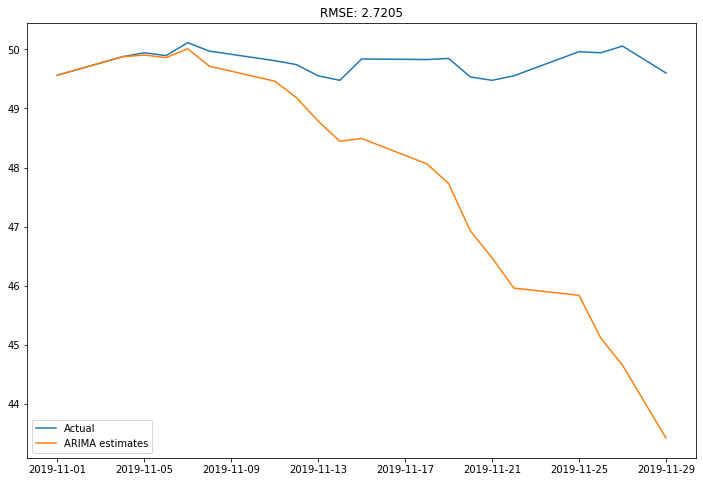

In [51]:
plt.figure(figsize=(12,8))
plt.plot(en, label="Actual")
plt.plot(predictions4_ARIMA, label="ARIMA estimates")
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions4_ARIMA-en)**2)/len(en)))

**Significant changes with regards to the values of the parameters?**

Our ARIMA models weren’t very useful in estimating either gold or equity ETF prices during this period. This is most likely due to the fact that our sample set is too small. 

Also, conceptually, the FED rate cut was a macro event which relies on factors beyond the scope of the model. Although an ARIMA model which covers a large dataset over several FED decisions may be useful in some sense but we have only used ARIMA on a small sample set.

------------
* 6.1 had two statistically significant coefficients ar(1) and ar(2) at very low p-values. Coefficients in this case were 0.7063 and -0.9830 for ar(1) and ar(2) respectively
* 6.4 had a statistically significant coefficient ar(1) at pvalue: 0.003. The coefficient for ar(1) was -0.9693.
 